In [1]:
# after ./parse_data.sh

In [ ]:
# remove all data

In [2]:
!hdr-plot --save ./swarm*exp12*
!hdr-plot --save ./swarm*exp13*
!hdr-plot --save ./swarm*exp14*
!hdr-plot --save ./swarm*exp15*


In [13]:
!hdr-plot --save ./k8s*exp12*
!hdr-plot --save ./k8s*exp13*
!hdr-plot --save ./k8s*exp14*
!hdr-plot --save ./k8s*exp15*

In [19]:
!hdr-plot --save ./nomad*exp12*
!hdr-plot --save ./nomad*exp13*
!hdr-plot --save ./nomad*exp14*
!hdr-plot --save ./nomad*exp15*

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(665, 20)


In [3]:
df['Requests'] = df['Requests'].astype(int)

In [4]:
df.columns

Index(['Latency', 'Requests', 'Throughput', 'Measured_Throughput', 'Baseline',
       'Orchestrator', 'Benchmark', 'Infinite', 'Exp', 'N', 'Availability',
       'Horizontal', 'Vertical', 'Threads', 'Connections', 'Duration', 'Mean',
       'Max', 'StdDev', 'ReqSec'],
      dtype='object')

In [5]:
# social network 
df_sn = df.loc[(df['Benchmark'] == 'sn')]
df_sn = df_sn.loc[(df_sn['Mean'].notna())]
df_sn.shape

(447, 20)

In [6]:
df_sn

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,8.65,500,14768.0,9851,1,k8s,sn,1,exp15,2,1,1,1,8,512,30,5.187,19.968,1.449,491.56
1,9.91,500,14826.0,9842,1,k8s,sn,1,exp15,1,1,1,1,8,512,30,4.138,22.720,2.000,493.16
2,8.70,500,14827.0,9842,1,k8s,sn,1,exp15,3,1,1,1,8,512,30,5.493,18.160,1.300,493.17
3,9.10,500,14768.0,9849,1,k8s,sn,1,exp15,4,1,1,1,8,512,30,5.760,11.984,1.252,491.55
4,9.04,500,14768.0,9852,1,k8s,sn,1,exp15,5,1,1,1,8,512,30,5.946,14.824,1.159,491.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,16840.00,10000,162530.0,106656,1,nomad,sn,1,exp14,2,0,0,1,8,512,30,8510.140,20627.456,3452.549,5415.08
101,2.83,10000,299057.0,199934,1,nomad,sn,1,exp14,1,0,0,1,8,512,30,0.953,78.720,1.397,9968.35
102,17450.00,10000,159644.0,105245,1,nomad,sn,1,exp14,1,0,0,1,8,512,30,8824.200,20627.456,3551.824,5321.43
103,2.91,10000,299102.0,199938,1,nomad,sn,1,exp14,5,0,0,1,8,512,30,1.012,87.232,2.159,9970.51


In [7]:
df_sn.columns

Index(['Latency', 'Requests', 'Throughput', 'Measured_Throughput', 'Baseline',
       'Orchestrator', 'Benchmark', 'Infinite', 'Exp', 'N', 'Availability',
       'Horizontal', 'Vertical', 'Threads', 'Connections', 'Duration', 'Mean',
       'Max', 'StdDev', 'ReqSec'],
      dtype='object')

In [8]:
df_sn_12 = df_sn.loc[df_sn['Exp'] == 'exp12']
df_sn_13 = df_sn.loc[df_sn['Exp'] == 'exp13']
df_sn_14 = df_sn.loc[df_sn['Exp'] == 'exp14']
df_sn_15 = df_sn.loc[df_sn['Exp'] == 'exp15']

In [9]:
combined_df = pd.concat([df_sn_12, df_sn_13, df_sn_14, df_sn_15]).reset_index()

In [10]:
combined_df.shape

(447, 21)

In [11]:
combined_df.shape

(447, 21)

In [12]:
print(df_sn_12.iloc[0,:])

Latency                   8.56
Requests                   500
Throughput             14719.0
Measured_Throughput       9863
Baseline                     0
Orchestrator               k8s
Benchmark                   sn
Infinite                     1
Exp                      exp12
N                            3
Availability                 0
Horizontal                   1
Vertical                     1
Threads                      8
Connections                512
Duration                    30
Mean                     5.341
Max                       17.6
StdDev                   1.388
ReqSec                  489.93
Name: 2, dtype: object


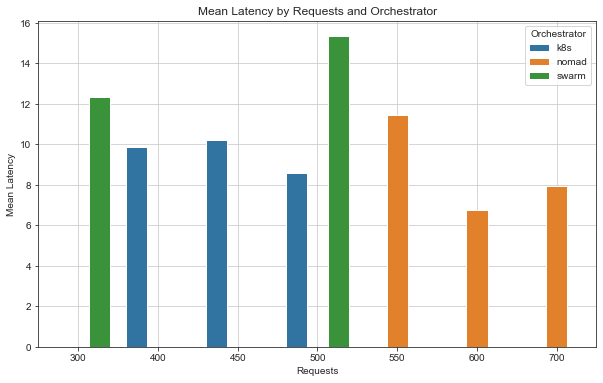

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

# Sample data creation
data = {
    'Latency': [8.56, 10.23, 7.95, 15.34, 6.77, 12.34, 9.87, 11.45],
    'Requests': [500, 450, 700, 500, 600, 300, 400, 550],
    'Orchestrator': ['k8s', 'k8s', 'nomad', 'swarm', 'nomad', 'swarm', 'k8s', 'nomad']
}

df = pd.DataFrame(data)

# Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Requests', y='Latency', hue='Orchestrator', ci='sd')

# Add labels and title
plt.title('Mean Latency by Requests and Orchestrator')
plt.xlabel('Requests')
plt.ylabel('Mean Latency')

# Enabling grid for both x and y axis
plt.grid(True, which='both', axis='both')



# Show plot
plt.show()

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Set theme to include the grid
# sns.set_theme(style="whitegrid") 
# Reset to default Matplotlib parameters
sns.reset_defaults()

In [15]:
def plot_lineplot(df_input, savefilename, legend=1):
    df = pd.DataFrame(df_input)

    # Specify the desired order for the 'Orchestrator'
    hue_order = ['swarm', 'k8s', 'nomad']

    # Create bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=df, x='Requests', y='Throughput', hue='Orchestrator', ci='sd', hue_order=hue_order)
    
    # Enabling grid for both x and y axis
    # plt.grid(True, which='both', axis='both')

    # Add labels and title
    # plt.title('Baseline, Mean Latency P99 Per Orchestrator for Social Network, N = 5')
    plt.title('')
    plt.xlabel('Requests', fontsize='15')
    plt.ylabel('Mean Latency P99 (ms)', fontsize='15')
    # plt.grid(True)
    # ax.grid(True)

    ax.grid(True, which='both', axis='both', zorder=0)
    ax.set_axisbelow(True)



    # Annotate each bar with the mean value
    for p in ax.patches:
        height = p.get_height()  # get the height of each bar
        ax.text(
            x=p.get_x() + p.get_width() / 2,  # X position of the text
            y=height + 0.5,                        # Y position of the text
            # y=y_offset,                        # Y position of the text

            s=f'{height:.1f}',               # Text string (formatted height)
            ha='center',                     # Horizontal alignment
            va='bottom',                     # Vertical alignment
            fontsize='medium',                  # Font size
            # weight='italic',
            color='black'
        )
    
    # yticks = [int(tick) for tick in ax.get_yticks()]
    # plt.xticks(ticks=range(df['Requests'].min(), df['Requests'].max() + 1, rotation = 45))
    # ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):3d}'))

    if (legend == 1):
        ax.legend(fontsize=15)
    else:
        # Turn off the legend
        ax.legend_.remove()

    
    # Show plot
    plt.tight_layout()

    # plt.show()
    plt.ylim(bottom=0)  # Ensure y-axis starts at 0

    # Save plot without extra whitespace around y-axis
    plt.savefig('{}-throughput.png'.format(savefilename), bbox_inches='tight')

/Users/stvdputten/Documents/Projects/Study/Orchestration/Dataset/venv/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

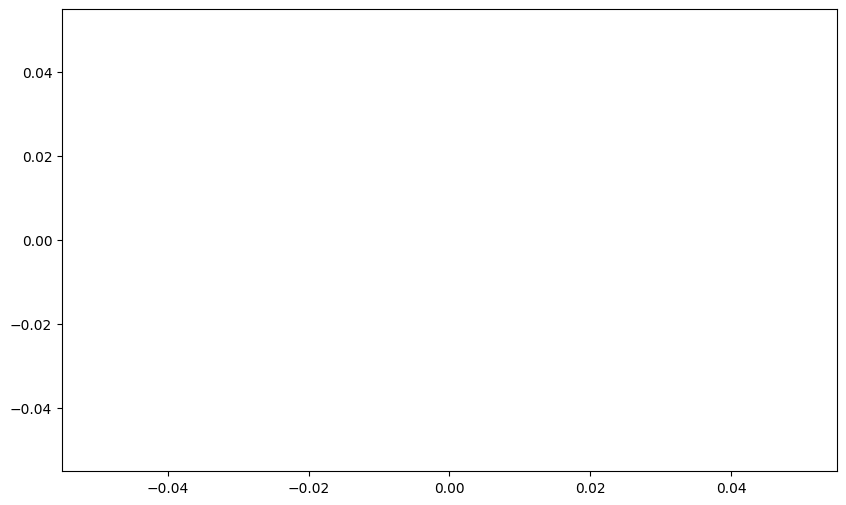

In [42]:
plot_barplot(df_sn_12, 'exp12')
plot_barplot(df_sn_13, 'exp13', 0)
plot_barplot(df_sn_14, 'exp14')
plot_barplot(df_sn_15, 'exp15', 0)

In [19]:
def plot_barplot(df_input, savefilename, legend=1):
    df = pd.DataFrame(df_input)

    # Specify the desired order for the 'Orchestrator'
    hue_order = ['swarm', 'k8s', 'nomad']

    # Create bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Requests', y='Latency', hue='Orchestrator', ci='sd', hue_order=hue_order)
    
    # Enabling grid for both x and y axis
    # plt.grid(True, which='both', axis='both')

    # Add labels and title
    # plt.title('Baseline, Mean Latency P99 Per Orchestrator for Social Network, N = 5')
    plt.title('')
    plt.xlabel('Requests per second', fontsize='15')
    plt.ylabel('Avg 99th Percentile Tail Latency (ms)', fontsize='15')
    # plt.grid(True)
    # ax.grid(True)

    ax.grid(True, which='both', axis='both', zorder=0)
    ax.set_axisbelow(True)



    # Annotate each bar with the mean value
    for p in ax.patches:
        height = p.get_height()  # get the height of each bar
        ax.text(
            x=p.get_x() + p.get_width() / 2,  # X position of the text
            y=height + 0.5,                        # Y position of the text
            # y=y_offset,                        # Y position of the text

            s=f'{height:.1f}',               # Text string (formatted height)
            ha='center',                     # Horizontal alignment
            va='bottom',                     # Vertical alignment
            fontsize='medium',                  # Font size
            # weight='italic',
            color='black'
        )
    
    # yticks = [int(tick) for tick in ax.get_yticks()]
    # plt.xticks(ticks=range(df['Requests'].min(), df['Requests'].max() + 1, rotation = 45))
    # ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):3d}'))

    if (legend == 1):
        ax.legend(fontsize=15)
    else:
        # Turn off the legend
        ax.legend_.remove()

    
    # Show plot
    plt.tight_layout()

    # plt.show()
    plt.ylim(bottom=0)  # Ensure y-axis starts at 0

    # Save plot without extra whitespace around y-axis
    plt.savefig('{}.png'.format(savefilename), bbox_inches='tight')

In [17]:
df_sn_12.shape

(97, 20)

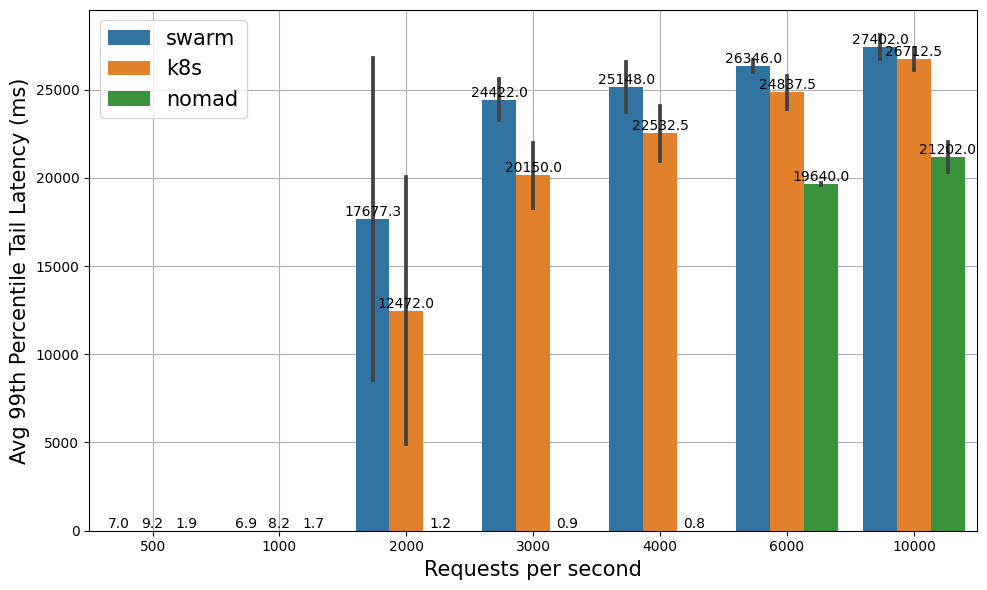

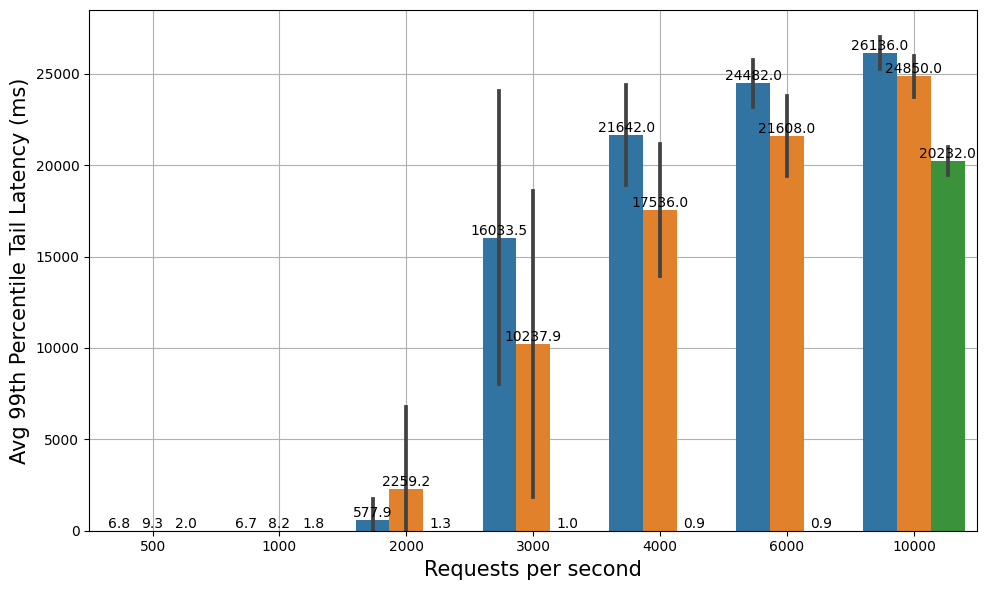

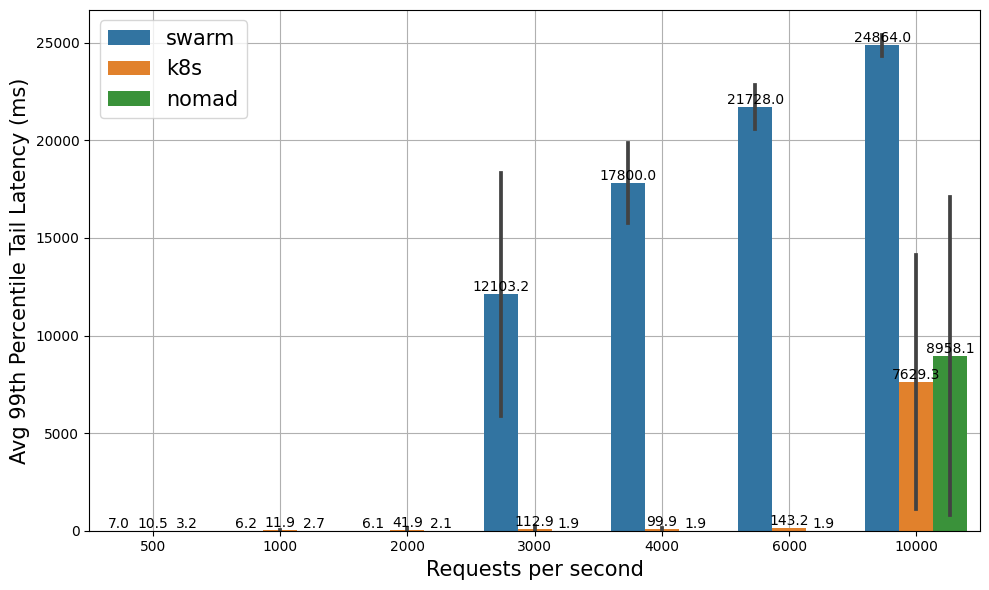

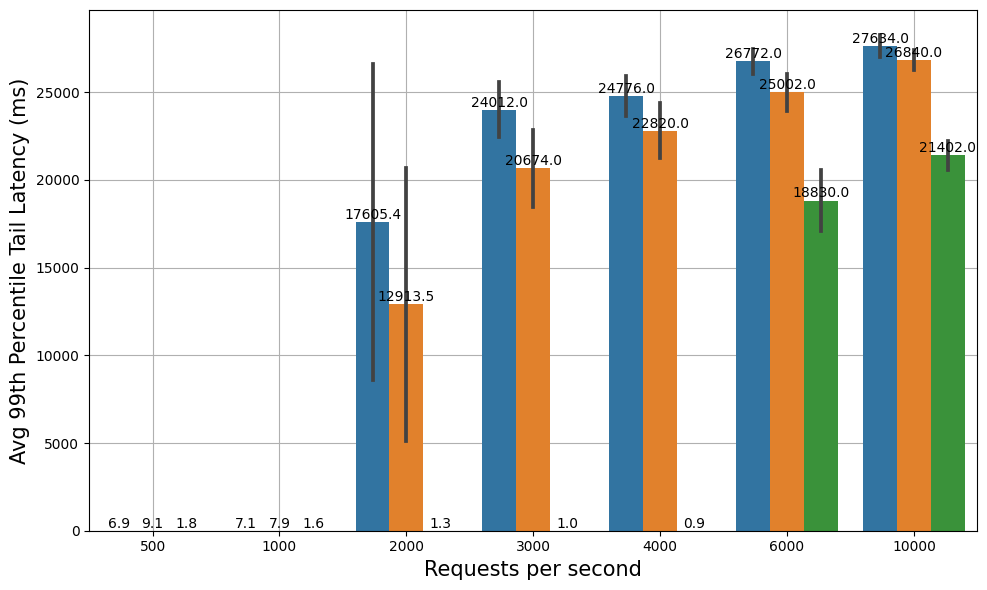

In [20]:
plot_barplot(df_sn_12, 'exp12')
plot_barplot(df_sn_13, 'exp13', 0)
plot_barplot(df_sn_14, 'exp14')
plot_barplot(df_sn_15, 'exp15', 0)

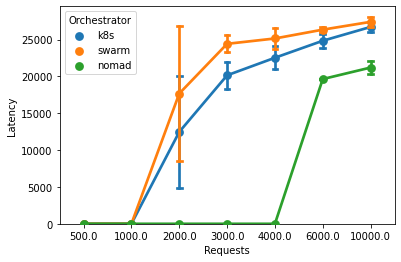

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data
# data = {
#     'Latency': [8.56, 10.23, 7.95, 15.34, 6.77, 12.34, 9.87, 11.45],
#     'Requests': [500, 450, 700, 500, 600, 300, 400, 550], 
#     'Orchestrator': ['k8s', 'k8s', 'nomad', 'swarm', 'nomad', 'swarm', 'k8s', 'nomad']
# }

df = pd.DataFrame(df_sn_12)

# Use Seaborn's pointplot
ax = sns.pointplot(x='Requests', y='Latency', data=df, ci='sd', capsize=.1, hue='Orchestrator')

# Annotate each bar with the mean value
for p in ax.patches:
    height = p.get_height()  # get the height of each bar
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # X position of the text
        y=height + 0.5,                        # Y position of the text
        s=f'{height:.1f}',               # Text string (formatted height)
        ha='center',                     # Horizontal alignment
        va='bottom',                     # Vertical alignment
        fontsize='12'                  # Font size
    )

plt.ylim(bottom=0)  # Ensure y-axis starts at 0

plt.show()

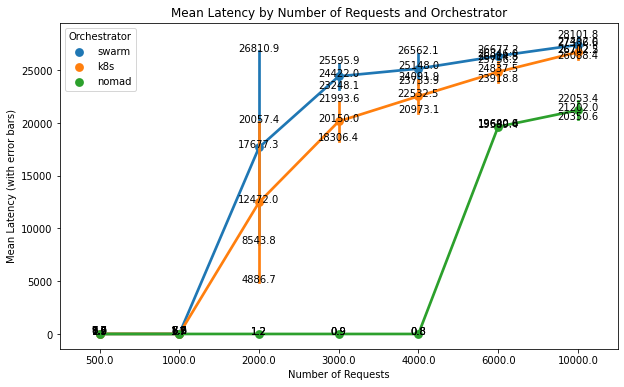

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (you should replace this with your actual dataset)
data = {
    'Requests': [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3],
    'Latency': [100, 110, 150, 140, 200, 190, 90, 105, 145, 135, 205, 195, 95, 100, 155, 145, 195, 185],
    'Orchestrator': ['swarm', 'swarm', 'swarm', 'swarm', 'swarm', 'swarm', 'k8s', 'k8s', 'k8s', 'k8s', 'k8s', 'k8s', 'nomad', 'nomad', 'nomad', 'nomad', 'nomad', 'nomad']
}

# Creating DataFrame
df = pd.DataFrame(df_sn_12)

# Creating point plot
plt.figure(figsize=(10, 6))
ax = sns.pointplot(x='Requests', y='Latency', hue='Orchestrator', data=df, ci='sd', hue_order=['swarm', 'k8s', 'nomad'])

# Adding title and labels
plt.title('Mean Latency by Number of Requests and Orchestrator')
plt.xlabel('Number of Requests')
plt.ylabel('Mean Latency (with error bars)')

# Annotating the mean values
for line in ax.lines:
    # finding the x, y coordinates of each point and its value
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{y:.1f}', color='black', ha='center')

# Displaying the plot
plt.show()